# Análisis de Datos


## Obtención de los datos y librerías necesarias.

In [1]:
# Importamos las librerías que usaremos durante el análisis:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy.stats as sts
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from IPython.display import display
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime


In [2]:
# time function using .time methods for later comparison
from timeit import default_timer as timer
start_ay = timer()

In [3]:
#Modifico los parametros preseteados para ver todas las columnas

pd.options.display.max_columns = None

#Modifico los parametros preseteados para ver todas las filas

pd.options.display.max_rows = 20

In [4]:
# Importamos el dataset
df = pd.read_csv('Pippo_tot.csv')

df.drop('Unnamed: 0', axis=1, inplace=True)

df.drop(df[df.Country == 'ITA'].index, inplace=True)
df.drop(df[df.Country == 'ESP'].index, inplace=True)

In [5]:
#Corrijo los nombres de las provincias AGREGADO 11.09.2019:

#Luego lo moveré al notebook de limpieza.

df.loc[df['State'] == 'B', 'State'] = 'Buenos Aires'
df.loc[df['State'] == 'C', 'State'] = 'Buenos Aires'
df.loc[df['State'] == 'D', 'State'] = 'Buenos Aires'
df.loc[df['State'] == 'CAPITAL FEDERAL', 'State'] = 'Buenos Aires'
df.loc[df['State'] == 'CAP. FEDERAL', 'State'] = 'Buenos Aires'
df.loc[df['State'] == 'E.RIOS', 'State'] = 'Entre Ríos'
df.loc[df['State'] == 'E RIOS', 'State'] = 'Entre Ríos'
df.loc[df['State'] == 'S', 'State'] = 'Santa Fé'
df.loc[df['State'] == 'X', 'State'] = 'Córdoba'
df.loc[df['State'] == 'T', 'State'] = 'Tucumán'
df.loc[df['State'] == 'H', 'State'] = 'Chaco'
df.loc[df['State'] == 'M', 'State'] = 'Mendoza'
df.loc[df['State'] == 'Q', 'State'] = 'Neuquén'
df.loc[df['State'] == 'G', 'State'] = 'Santiago Del Estero'
df.loc[df['State'] == 'Y', 'State'] = 'Jujuy'
df.loc[df['State'] == '3400', 'State'] = 'Corrientes'
df.loc[df['State'] == 'TIERRA DEL FUEGO', 'State'] = 'Tierra del Fuego'

In [6]:
df.shape

(428450, 29)

In [7]:
df.columns

Index(['Id', 'ProductId', 'Quantity', 'Name', 'Price', 'ListPrice',
       'PromoName', 'GrossItemAmountDiscount', 'RawItemDiscount',
       'ShippingDataId', 'OrderId', 'DocumentType', 'AddressType', 'City',
       'Country', 'Lat', 'Lng', 'PostalCode', 'State', 'Street', 'Documento',
       'Value', 'HostName', 'TotalOrderGross', 'TotalDiscountPrice',
       'ShippingCost', 'OrderDate', 'ProductLine', 'ProductType'],
      dtype='object')

## Analizo que valores hay en columnas

In [8]:
df.sample(3)

,Id,ProductId,Quantity,Name,Price,ListPrice,PromoName,GrossItemAmountDiscount,RawItemDiscount,ShippingDataId,OrderId,DocumentType,AddressType,City,Country,Lat,Lng,PostalCode,State,Street,Documento,Value,HostName,TotalOrderGross,TotalDiscountPrice,ShippingCost,OrderDate,ProductLine,ProductType
425456,2045,447,1,Juego de Toalla y Toallón Línea Turbat Color G...,699.0,699.0,NoPromo,0.0,0.0,707e1536-87e3-487c-8a45-fbadfe968489,929040708724-01,dni1,pickup,Neuquén,ARG,-38.959578,-68.092604,8300.0,Neuquén,Juan Julián Lastra,157388,2097.0,Pippo,3444.0,-1347.0,0.0,2019-02-05,Baño,Toallas y Toallones
25236,4333,2378,3,Aromatizador de Ambiente Roses are Red Color B...,349.0,349.0,DISCOUNT@MARKETPLACE,-1047.0,-1047.0,48ec76c2-e8f3-46ee-98e1-de6b6130c668,934462667985-01,dni1,pickup,Ciudad Autónoma de Buenos Aires,ARG,-34.590566,-58.408505,1425.0,Buenos Aires,Av. Santa Fe,5742,1047.0,Pippo,2094.0,-1047.0,0.0,2019-05-24,Accesorios,Aromatizadores
357055,1981,1127,1,Juego de Sábanas King Size Búlgaro Tricolor Co...,2199.0,2199.0,discount@shipping-40c34184-f75c-45e7-a4d5-e4e2...,-1099.5,-149.5,f15f13a8-6db5-4141-8bcc-ac7ddee50d14,841210746407-01,dni1,residential,Ciudad Autónoma Buenos Aires,ARG,0.000000,0.000000,1427.0,Buenos Aires,TRONADOR,121088,2399.0,Pippo,4798.0,-2399.0,0.0,2018-06-21,Dormitorio,Sábanas


In [9]:
# Hay 3 tipos de documentos segun pais, dividi en 3 por DNI Argentino 1 nacionales, 2 extranjeros en Arg. y 3 Uruguay
df.DocumentType.value_counts()

dni1    396224
dni3     23045
dni2      9181
Name: DocumentType, dtype: int64

In [10]:
df.AddressType.value_counts()

residential    256319
pickup         172021
commercial        110
Name: AddressType, dtype: int64

In [11]:
df.Country.value_counts()

ARG    405402
URY     23048
Name: Country, dtype: int64

In [12]:
df.Quantity.value_counts()

1     373652
2      45778
3       4554
4       2829
6        978
5        478
10        68
8         66
7         40
9          6
20         1
Name: Quantity, dtype: int64

In [13]:
# nombre del productoa  comprar
df.Name.nunique()

3940

In [14]:
df.ProductType.value_counts()

Sábanas                  146203
Acolchados y Frazadas     85228
Toallas y Toallones       62995
Almohadones               51823
Mantelería                16803
Almohadas                 13569
Cortinas                   9669
Cama                       7177
Adornos                    5950
Accesorios                 5120
                          ...  
Lonas                      1076
Para Trabajo                737
Sillas                      634
Jabones y Jaboneras         616
Cajas y Cajones             568
Bandejas                    525
Jardín                      330
Bebé                        280
Vajilla                     101
Velas                        94
Name: ProductType, Length: 27, dtype: int64

In [15]:
# En que fechas se realizan compras

df.OrderDate.value_counts()

2018-05-14    14153
2019-05-15    13990
2018-10-31    13432
2018-05-15    13091
2018-05-16    12870
2019-05-13    12334
2018-10-30    12270
2018-10-29    11269
2019-05-14    10795
2018-06-25     9889
              ...  
2018-02-12        4
2018-09-05        4
2018-06-12        4
2018-03-12        4
2018-07-05        3
2019-06-25        2
2018-09-12        2
2018-06-08        2
2019-03-03        1
2018-03-08        1
Name: OrderDate, Length: 367, dtype: int64

In [16]:
# Desde donde se realizan compras, pais, state, city y barrio
df.Country.value_counts()

ARG    405402
URY     23048
Name: Country, dtype: int64

In [17]:
df.State.value_counts()

Buenos Aires      304354
Santa Fé           33238
Montevideo         15417
Tucumán            10580
Entre Ríos          6895
Mendoza             5879
Río Negro           5028
Chubut              4917
Chaco               4646
Neuquén             4452
                   ...  
CERRO LARGO           82
DURAZNO               81
Rivera                71
RIVERA                70
Treinta Y Tres        61
ARTIGAS               56
TACUAREMBÓ            56
TREINTA Y TRES        41
FLORES                22
Treinta y tres         2
Name: State, Length: 55, dtype: int64

In [18]:
# Identificando codigos
df.Name[df.ProductId == 1930]

0              Juego de Toalla y Toallón Liso Color Blanco
312              Juego de Toalla y Toallón Liso Color Rosa
371              Juego de Toalla y Toallón Liso Color Rosa
902            Juego de Toalla y Toallón Liso Color Blanco
1152           Juego de Toalla y Toallón Liso Color Blanco
1153           Juego de Toalla y Toallón Liso Color Blanco
1506       Juego de Toalla y Toallón Liso Color Gris Claro
1507       Juego de Toalla y Toallón Liso Color Gris Claro
1628           Juego de Toalla y Toallón Liso Color Blanco
1629           Juego de Toalla y Toallón Liso Color Blanco
                                ...                       
425969    Juego de Toalla y Toallón Liso Color Verde Claro
426514         Juego de Toalla y Toallón Liso Color Blanco
426547         Juego de Toalla y Toallón Liso Color Blanco
426564           Juego de Toalla y Toallón Liso Color Rosa
426568     Juego de Toalla y Toallón Liso Color Gris Claro
426694         Juego de Toalla y Toallón Liso Color Blan

In [19]:
df.Name[df.Id == 3483]

0         Juego de Toalla y Toallón Liso Color Blanco
902       Juego de Toalla y Toallón Liso Color Blanco
1152      Juego de Toalla y Toallón Liso Color Blanco
1153      Juego de Toalla y Toallón Liso Color Blanco
1628      Juego de Toalla y Toallón Liso Color Blanco
1629      Juego de Toalla y Toallón Liso Color Blanco
3420      Juego de Toalla y Toallón Liso Color Blanco
3571      Juego de Toalla y Toallón Liso Color Blanco
3572      Juego de Toalla y Toallón Liso Color Blanco
6648      Juego de Toalla y Toallón Liso Color Blanco
                             ...                     
422069    Juego de Toalla y Toallón Liso Color Blanco
422448    Juego de Toalla y Toallón Liso Color Blanco
425073    Juego de Toalla y Toallón Liso Color Blanco
425158    Juego de Toalla y Toallón Liso Color Blanco
425617    Juego de Toalla y Toallón Liso Color Blanco
425618    Juego de Toalla y Toallón Liso Color Blanco
426514    Juego de Toalla y Toallón Liso Color Blanco
426547    Juego de Toalla y 

In [20]:
a = df.groupby('Id')['ProductId'].count()
a

Id
3       162
4        39
6        79
8        12
9        12
10        3
11      323
12      148
13      613
20      134
       ... 
5125      9
5127     16
5128     14
5129     18
5130      3
5131      4
5134      1
5138      3
5149     18
5189      1
Name: ProductId, Length: 4085, dtype: int64

In [21]:
df.Name[df.Id == 5]

Series([], Name: Name, dtype: object)

In [22]:
# Para convertir el dato en formato fecha
import dateutil

df['OrderDate'] = df['OrderDate'].apply(dateutil.parser.parse, dayfirst=True)

In [23]:
df['OrderDate'].head()

0   2019-06-05
1   2019-06-05
2   2019-06-05
3   2019-06-05
4   2018-09-24
Name: OrderDate, dtype: datetime64[ns]

In [24]:
# How many entries are there for each month?
df['OrderDate'].value_counts()

2018-05-14    14153
2019-05-15    13990
2018-10-31    13432
2018-05-15    13091
2018-05-16    12870
2019-05-13    12334
2018-10-30    12270
2018-10-29    11269
2019-05-14    10795
2018-06-25     9889
              ...  
2018-12-03        4
2018-12-06        4
2018-12-02        4
2018-05-09        4
2018-05-07        3
2019-06-25        2
2018-08-06        2
2018-12-09        2
2018-08-03        1
2019-03-03        1
Name: OrderDate, Length: 367, dtype: int64

In [25]:
df.groupby(['OrderDate']).agg({'Quantity': 'count', 'Price': 'sum'})

#data.groupby('month', as_index=False).agg({"duration": "sum"})


,Quantity,Price
OrderDate,,
2018-04-04,99,77095.5
2018-04-05,24,19987.8
2018-04-06,61,39570.8
2018-04-07,178,113689.8
2018-04-08,154,117135.9
2018-04-09,279,246415.7
2018-04-10,340,250393.2
2018-04-11,230,190449.4
2018-04-12,203,162761.5


In [26]:
df.State.value_counts()
#Length: 129

Buenos Aires      304354
Santa Fé           33238
Montevideo         15417
Tucumán            10580
Entre Ríos          6895
Mendoza             5879
Río Negro           5028
Chubut              4917
Chaco               4646
Neuquén             4452
                   ...  
CERRO LARGO           82
DURAZNO               81
Rivera                71
RIVERA                70
Treinta Y Tres        61
ARTIGAS               56
TACUAREMBÓ            56
TREINTA Y TRES        41
FLORES                22
Treinta y tres         2
Name: State, Length: 55, dtype: int64

In [27]:
df_cantidades = (df.groupby(['State'])['Quantity'].sum().sort_values(ascending=False))
print("TOP 10 PROVINCIAS CON MAYOR DEMANDA")
print(df_cantidades.head(10))

TOP 10 PROVINCIAS CON MAYOR DEMANDA
State
Buenos Aires    351313
Santa Fé         38880
Montevideo       18257
Tucumán          13123
Entre Ríos        8276
Mendoza           7108
Río Negro         6098
Chubut            5855
Chaco             5606
Neuquén           5211
Name: Quantity, dtype: int64


In [28]:
df_cantidades1 = df.groupby(['State','ProductType'])['Quantity'].sum()

#Vemos que productos son los más comprados en las 10 provincias que más demandan
df_cantidades1_buenosaires = df_cantidades1.agg(lambda x: x.loc["Buenos Aires"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Buenos Aires")
print(df_cantidades1_buenosaires.head(5))
print()
df_cantidades1_santafe = df_cantidades1.agg(lambda x: x.loc["Santa Fé"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Santa Fé")
print(df_cantidades1_santafe.head(5))
print()
df_cantidades1_montevideo = df_cantidades1.agg(lambda x: x.loc["Montevideo"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Montevideo")
print(df_cantidades1_montevideo.head(5))
print()
df_cantidades1_tucuman = df_cantidades1.agg(lambda x: x.loc["Tucumán"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Tucumán")
print(df_cantidades1_tucuman.head(5))
print()
df_cantidades1_entrerios = df_cantidades1.agg(lambda x: x.loc["Entre Ríos"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Entre Ríos")
print(df_cantidades1_entrerios.head(5))

TOP 5 productos más demandados en Buenos Aires
ProductType
Sábanas                  108172
Acolchados y Frazadas     62240
Toallas y Toallones       55625
Almohadones               50818
Mantelería                15480
Name: Quantity, dtype: int64

TOP 5 productos más demandados en Santa Fé
ProductType
Sábanas                  12393
Acolchados y Frazadas     7715
Toallas y Toallones       5923
Almohadones               5208
Mantelería                1717
Name: Quantity, dtype: int64

TOP 5 productos más demandados en Montevideo
ProductType
Sábanas                  5138
Acolchados y Frazadas    3785
Almohadones              3265
Toallas y Toallones      2797
Mantelería                825
Name: Quantity, dtype: int64

TOP 5 productos más demandados en Tucumán
ProductType
Sábanas                  3440
Acolchados y Frazadas    2412
Almohadones              2207
Toallas y Toallones      2184
Mantelería                767
Name: Quantity, dtype: int64

TOP 5 productos más demandados en Entre 

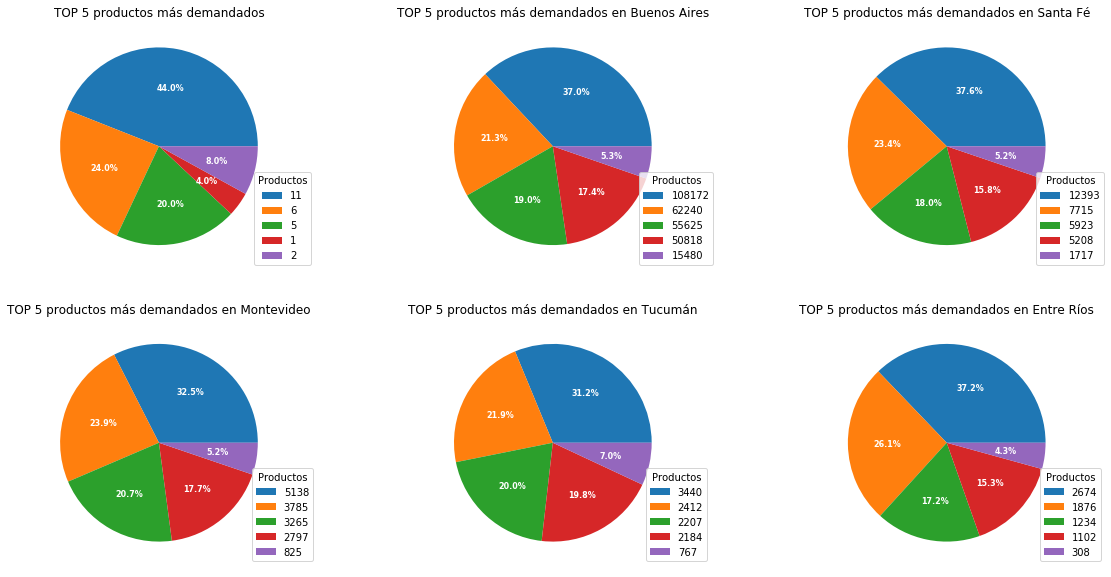

In [29]:
# Agrego Gráficos a lo analizado por zonas y productos:

#Defino los rangos de los gráficos:
a = df_cantidades1[0:5]
b = df_cantidades1_buenosaires[0:5]
c = df_cantidades1_santafe[0:5]
d = df_cantidades1_montevideo[0:5]
e = df_cantidades1_tucuman[0:5]
f = df_cantidades1_entrerios[0:5]

# Generamos el entorno de la figura
plt.figure(figsize=(20, 10))

# Dividimos el área en áreas de 3 filas x 3 columnas (grids)

# Forma de la grilla y posición del subplot
plt.subplot(231) # seleccionamos el #1 de la fila #1
wedges, texts, autotexts = plt.pie(a, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(a, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados')


plt.subplot(232) # seleccionamos el #2 de la fila #1
wedges, texts, autotexts = plt.pie(b, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(b, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados en Buenos Aires')


plt.subplot(233) # seleccionamos el #3 de la fila #1
wedges, texts, autotexts = plt.pie(c, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(c, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados en Santa Fé')

plt.subplot(234) # seleccionamos el #1 de la fila #2
wedges, texts, autotexts = plt.pie(d, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(d, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados en Montevideo')

plt.subplot(235) # seleccionamos el #2 de la fila #2
wedges, texts, autotexts = plt.pie(e, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(e, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados en Tucumán')

plt.subplot(236) # seleccionamos el #3 de la fila #2
wedges, texts, autotexts = plt.pie(f, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(f, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados en Entre Ríos')


plt.show()

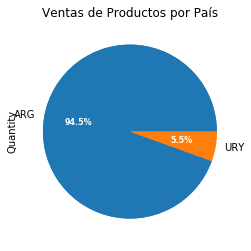

In [30]:
#Analizo ahora la composición por país:

df.groupby('Country')['Quantity'].sum().plot(kind='pie')

wedges, texts, autotexts = plt.pie(df.groupby('Country')['Quantity'].sum()
                                   , autopct='%1.1f%%', textprops=dict(color="w"))
plt.setp(autotexts, size=8, weight="bold")
plt.title('Ventas de Productos por País')
#plt.legend(loc="upper right")

plt.show()

## Analizaremos la información de ventas con perspectiva geográfica


In [31]:
# Importamos las librerías que usaremos para el ploteo:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [32]:
df.columns

Index(['Id', 'ProductId', 'Quantity', 'Name', 'Price', 'ListPrice',
       'PromoName', 'GrossItemAmountDiscount', 'RawItemDiscount',
       'ShippingDataId', 'OrderId', 'DocumentType', 'AddressType', 'City',
       'Country', 'Lat', 'Lng', 'PostalCode', 'State', 'Street', 'Documento',
       'Value', 'HostName', 'TotalOrderGross', 'TotalDiscountPrice',
       'ShippingCost', 'OrderDate', 'ProductLine', 'ProductType'],
      dtype='object')

In [33]:
# Importamos los datos de ventas

sales = df[['Lng' ,'Lat',  'OrderId', 'State', 'City', 'Country', 'Id', 'ProductId', 'ProductLine', 'ProductType', 'Quantity']]#pd.read_csv('/content/drive/My Drive/Data Science/Desafios/Git/Testing/Pippo_tot.csv', usecols = ['Lng' ,'Lat',  'OrderId', 'State', 'City', 'Country', 'Id', 'ProductId', 'ProductLine', 'ProductType', 'Quantity'])
sales = sales[sales['Country'] == 'ARG']

In [34]:
# Genero el mapa de Argentina desde el Mapa Mundial alojado en el dataset de Geopandas:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
AR = world[world.name == 'Argentina']
UY = world[world.name == 'Uruguay']


In [35]:
# Leo el mapa ( http://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG)

argentina_fp = 'provincia.geojson'
map_gdf = gpd.read_file(argentina_fp)
map_gdf = map_gdf [ map_gdf.NAM != 'Tierra del Fuego, Antártida e Islas del Atlántico Sur' ]

In [36]:
#Importamos el archivo de geolocalizaciones para reemplazar los outsiders de latitud y longitud

geo = pd.read_csv('AR.txt', header = None, sep="\t")

In [37]:
#Adecuamos el Dataframe de geolocalizaciones:

#Cambiamos el nombre de las columnas relevantes:
geo.rename(columns = {0:'geonameid',1:'City',4:'Lat',5:'Lng'}, inplace = True)

#Reducimos los valores decimales de latitud y longitud:
#geo['lat'] = pd.Series([round(val, 8) for val in geo['lat']], index = geo.index)
#geo['lng'] = pd.Series([round(val, 8) for val in geo['lng']], index = geo.index)

#Limpiamos el Dataframe de Geolocalizaciones eliminando las columnas que no contienen información relevante:
geo.drop([2,3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], axis=1, inplace=True)

In [38]:
#Genero máscaras para limpíar las latitudes en Cero:

mask1 = sales['Lat'] == 0
mask2 = sales['Lat'] != 0


In [39]:
#Creamos un diccionario para mapear latitudes en cero:
latitud_dict = {}

#Creamos una tupla con los pares de key y value
geoname_lat = zip(sales[mask2]['City'],sales[mask2]['Lat'])

#Rellenamos el diccionario
for geoname, latitud in geoname_lat:
    latitud_dict[geoname] = latitud

#Aplicamos el reemplazo:

sales.loc[(sales['Lat'] == 0) ,'Lat'] = sales['City'].map(latitud_dict)

In [40]:
#Creamos un diccionario para mapear longitudes en cero:
longitud_dict = {}

#Creamos una tupla con los pares de key y value
geoname_lng = zip(sales[mask2]['City'],sales[mask2]['Lng'])

#Rellenamos el diccionario
for geoname, longitud in geoname_lng:
    longitud_dict[geoname] = longitud
    
#Aplicamos el reemplazo:
sales.loc[(sales['Lng'] == 0),'Lng'] = sales['City'].map(longitud_dict)

In [41]:
#Genero un GeoDataFrame con el Dataset
gdf = gpd.GeoDataFrame(
    sales, geometry=gpd.points_from_xy(sales.Lng, sales.Lat))

In [42]:
# Identificamos los puntos que se encuentran dentro del perimetro de Argentina

inside_point = AR

ar_map = inside_point
ar_map.reset_index(drop=True, inplace=True)
import shapely.speedups
shapely.speedups.enable()

pip_mask = gdf.within(ar_map.loc[0, 'geometry'])

pip_gdf = gdf.loc[pip_mask]

In [43]:
pip_mask.value_counts()

True     369780
False     35622
dtype: int64

### Realizo la limpieza de geo-puntos con valores de latitud y longitud que mapean fuera del perimetro de argentina, para corregir sus coordenadas erroneas.

In [44]:
#Genero un Dataframe con los registros excluidos del perimetro de Argentina:

non_pip = sales.loc[~pip_mask]
non_pip.Lat = np.nan
non_pip.Lng = np.nan
del non_pip['geometry']
print(non_pip.shape)

(35622, 11)


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [45]:
#1er. Mapeo latitudes y longitudes aproximadas para corregir los errores

#1ra rueda de correcciones por City:

Lt = dict(zip(geo['City'],geo['Lat']))
non_pip['Lat'] = non_pip['Lat'].fillna(non_pip['City'].map(Lt))

Lg = dict(zip(geo['City'],geo['Lng']))
non_pip['Lng'] = non_pip['Lng'].fillna(non_pip['City'].map(Lg))


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
#2do. Mapeo latitudes y longitudes aproximadas para corregir los errores

#2da rueda de correcciones (por State):

Lt = dict(zip(sales['State'],sales['Lat']))
non_pip['Lat'] = non_pip['Lat'].fillna(non_pip['State'].map(Lt))

Lg = dict(zip(sales['State'],sales['Lng']))
non_pip['Lng'] = non_pip['Lng'].fillna(non_pip['State'].map(Lg))


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
#Genero un GeoDataFrame con el Dataset de Outsiders
non_pip_gdf = gpd.GeoDataFrame(
    non_pip, geometry=gpd.points_from_xy(non_pip.Lng, non_pip.Lat))

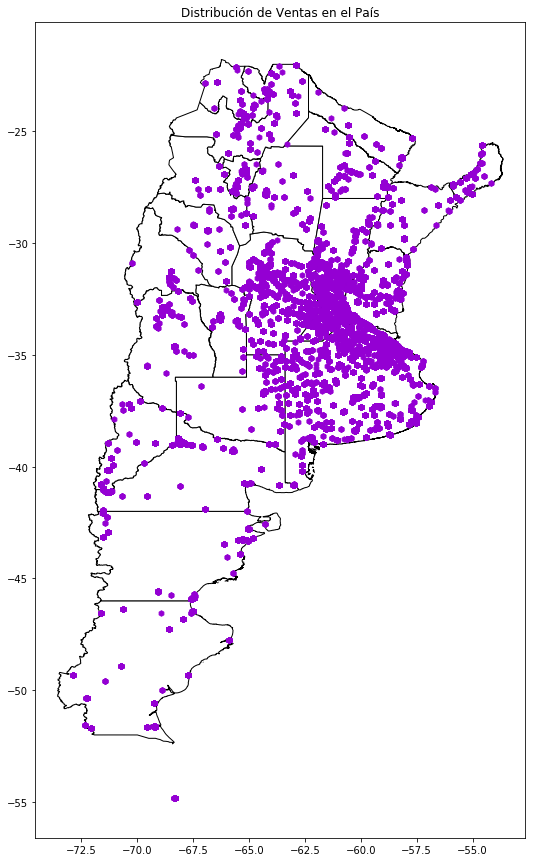

In [48]:
#Genero el mapa de Argentina desde el dataset de IGM (con división de provincias):


fig, ax = plt.subplots(figsize=(30, 15))
ax.set_aspect('equal')
ax = map_gdf.plot(ax=ax, color='white', edgecolor='black')
#ax = AR.plot(ax=ax, color='white', edgecolor='black')

#Ploteo de puntos de ventas
pip_gdf.plot(ax=ax,marker='h', color='darkviolet', markersize=30)
non_pip_gdf.plot(ax=ax,marker='h', color='darkviolet', markersize=30)
plt.title('Distribución de Ventas en el País')
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/anaconda3/lib/python3.7/site-packages/matplotl

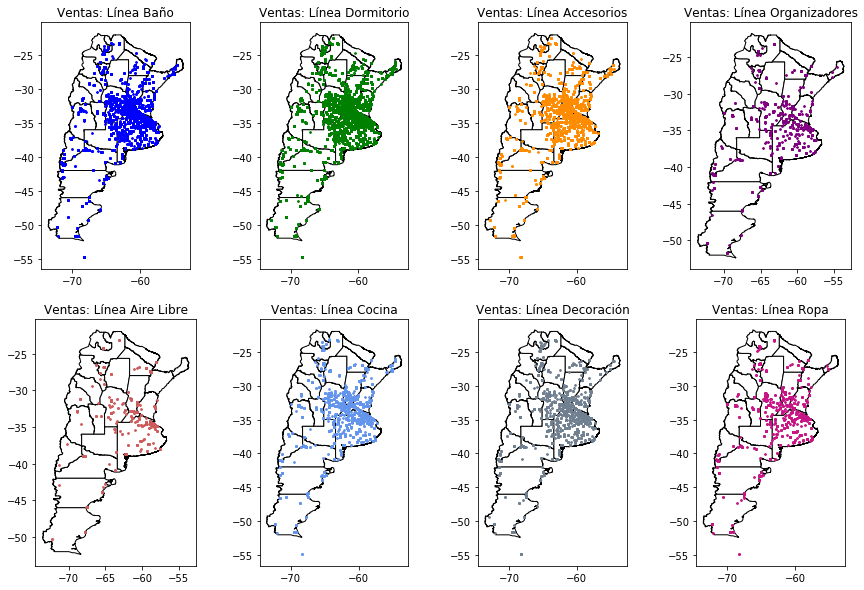

In [49]:
#Defino los rangos de los mapas:

a = pip_gdf[pip_gdf.ProductLine == 'Baño']
b = pip_gdf[pip_gdf.ProductLine == 'Dormitorio']
c = pip_gdf[pip_gdf.ProductLine == 'Accesorios']
d = pip_gdf[pip_gdf.ProductLine == 'Organizadores']
e = pip_gdf[pip_gdf.ProductLine == 'Aire Libre']
f = pip_gdf[pip_gdf.ProductLine == 'Cocina']
g = pip_gdf[pip_gdf.ProductLine == 'Decoración']
h = pip_gdf[pip_gdf.ProductLine == 'Ropa']

a1 = pip_gdf[pip_gdf.ProductLine == 'Baño']
b1 = pip_gdf[pip_gdf.ProductLine == 'Dormitorio']
c1 = pip_gdf[pip_gdf.ProductLine == 'Accesorios']
d1 = pip_gdf[pip_gdf.ProductLine == 'Organizadores']
e1 = pip_gdf[pip_gdf.ProductLine == 'Aire Libre']
f1 = pip_gdf[pip_gdf.ProductLine == 'Cocina']
g1 = pip_gdf[pip_gdf.ProductLine == 'Decoración']
h1 = pip_gdf[pip_gdf.ProductLine == 'Ropa']


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(241)
ax1 = fig.add_subplot(242)
ax2 = fig.add_subplot(243)
ax3 = fig.add_subplot(244)
ax4 = fig.add_subplot(245)
ax5 = fig.add_subplot(246)
ax6 = fig.add_subplot(247)
ax7 = fig.add_subplot(248)


# Forma de la grilla y posición del subplot
plt.subplot(241) # seleccionamos el #1 de la fila #1

ax.set_aspect('equal')
ax = map_gdf.plot(ax=ax, color='white', edgecolor='black')

#Ploteo de puntos de ventas
a.plot(ax=ax,marker='o', color='blue', markersize=2)
a1.plot(ax=ax,marker='o', color='blue', markersize=2)
ax.title.set_text('Ventas: Línea Baño')

plt.subplot(242) # seleccionamos el #2 de la fila #1

ax1.set_aspect('equal')
ax1 = map_gdf.plot(ax=ax1, color='white', edgecolor='black')

#Ploteo de puntos de ventas
b.plot(ax=ax1,marker='o', color='green', markersize=2)
b1.plot(ax=ax1,marker='o', color='green', markersize=2)
ax1.title.set_text('Ventas: Línea Dormitorio')

plt.subplot(243) # seleccionamos el #3 de la fila #1

ax2.set_aspect('equal')
ax2 = map_gdf.plot(ax=ax2, color='white', edgecolor='black')

#Ploteo de puntos de ventas
c.plot(ax=ax2,marker='o', color='darkorange', markersize=2)
c1.plot(ax=ax2,marker='o', color='darkorange', markersize=2)

ax2.title.set_text('Ventas: Línea Accesorios')

plt.subplot(244) # seleccionamos el #4 de la fila #1

ax3.set_aspect('equal')
ax3 = map_gdf.plot(ax=ax3, color='white', edgecolor='black')

#Ploteo de puntos de ventas
d.plot(ax=ax3,marker='o', color='purple', markersize=2)
d1.plot(ax=ax3,marker='o', color='purple', markersize=2)
ax3.title.set_text('Ventas: Línea Organizadores')

plt.subplot(245) # seleccionamos el #1 de la fila #2

ax4.set_aspect('equal')
ax4 = map_gdf.plot(ax=ax4, color='white', edgecolor='black')

#Ploteo de puntos de ventas
e.plot(ax=ax4,marker='o', color='indianred', markersize=2)
e1.plot(ax=ax4,marker='o', color='indianred', markersize=2)
ax4.title.set_text('Ventas: Línea Aire Libre')


plt.subplot(246) # seleccionamos el #2 de la fila #2

ax5.set_aspect('equal')
ax5 = map_gdf.plot(ax=ax5, color='white', edgecolor='black')

#Ploteo de puntos de ventas
f.plot(ax=ax5,marker='o', color='cornflowerblue', markersize=2)
f1.plot(ax=ax5,marker='o', color='cornflowerblue', markersize=2)
ax5.title.set_text('Ventas: Línea Cocina')


plt.subplot(247) # seleccionamos el #3 de la fila #2

ax6.set_aspect('equal')
ax6 = map_gdf.plot(ax=ax6, color='white', edgecolor='black')

#Ploteo de puntos de ventas
g.plot(ax=ax6,marker='o', color='slategray', markersize=2)
g1.plot(ax=ax6,marker='o', color='slategray', markersize=2)
ax6.title.set_text('Ventas: Línea Decoración')


plt.subplot(248) # seleccionamos el #4 de la fila #2

ax7.set_aspect('equal')
ax7 = map_gdf.plot(ax=ax7, color='white', edgecolor='black')

#Ploteo de puntos de ventas
h.plot(ax=ax7,marker='o', color='mediumvioletred', markersize=2)
h1.plot(ax=ax7,marker='o', color='mediumvioletred', markersize=2)
ax7.title.set_text('Ventas: Línea Ropa')

plt.show()

In [50]:
end_ay = timer()

In [51]:
# calcualte function runtime
time_ay = (end_ay - start_ay)/60

In [52]:
print (time_ay)

4.416006466883333
